## Strategy 

In order to optimize marketing campaigns with the help of the dataset, we will have to take the following steps:

1-Import data from dataset and perform initial high-level analysis: look at the number of rows, look at the missing values, look at dataset columns and their values respective to the campaign outcome.

2- Clean the data: remove irrelevant columns, deal with missing and incorrect values, turn categorical columns into dummy variables.

3- Use machine learning techniques to predict the marketing campaign outcome and to find out factors, which affect the success of the campaign.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data
First of all to perform the analysis, we have to import the data:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank-Marketing.csv to bank-Marketing.csv


In [ ]:
df = pd.read_csv('bank-Marketing.csv',delimiter=';')

In [ ]:
df.shape

(41188, 21)

as shown above the data (Bank marketing) dataset consists of 41188 rows. we have choose randomly a subset (10%) of this data by using sample.function

In [ ]:
def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train_dataset = df.iloc[perm[:train_end]]
    validate_dataset = df.iloc[perm[train_end:validate_end]]
    test_dataset = df.iloc[perm[validate_end:]]
    return train_dataset, validate_dataset, test_dataset


In [ ]:
train_dataset, validate_dataset, test_dataset = train_validate_test_split(df)

In [ ]:
train_dataset.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
9003,29,services,single,high.school,no,yes,no,telephone,jun,thu,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,yes
33400,33,services,divorced,high.school,no,no,no,cellular,may,tue,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,no
14765,49,blue-collar,divorced,unknown,unknown,no,no,cellular,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no
21853,42,technician,married,professional.course,no,yes,no,cellular,aug,wed,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,yes
19400,37,admin.,married,university.degree,unknown,no,no,cellular,aug,wed,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1,yes


In [ ]:
train_dataset.shape

(24712, 21)

In [ ]:
test_dataset.shape

(8239, 21)

In [ ]:
validate.shape

#question 2

In [ ]:
data10 = train_dataset.sample(frac =.1,random_state = 42)

## Data Exploration
After we imported the dataset, we have to look at the total number of rows in the dataset and analyze the number of missing values.

In [ ]:
data10.shape

(2471, 21)

the new data consists of 4119 records

In [ ]:
data10.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
38017,58,retired,married,basic.4y,no,no,no,telephone,sep,wed,...,1,999,0,nonexistent,-3.4,92.379,-29.8,0.781,5017.5,no
33110,45,admin.,single,high.school,unknown,unknown,unknown,cellular,may,tue,...,12,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,no
22577,36,management,married,university.degree,unknown,no,no,telephone,aug,fri,...,4,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
22190,32,admin.,single,university.degree,no,yes,no,cellular,aug,thu,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
2195,47,services,divorced,high.school,no,no,no,telephone,may,mon,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
plt.style.use('fivethirtyeight')
sns.set_context('paper')

In [ ]:
data10.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
data10.columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit']



## Class Distribution
the important thing to make sure before feeding our data into the model is the class distribution of the data. In our case where the expected class are divided into two outcome, 'yes' and 'no', a class distribution of 50:50 can be considered ideal.

In [ ]:
data10['deposit'].value_counts()

no     2208
yes     263
Name: deposit, dtype: int64

As we can see our class distribution is more or less similar, not exactly 50:50 distribution but still good enough.

In [ ]:
data10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2471 entries, 38017 to 8397
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2471 non-null   int64  
 1   job             2471 non-null   object 
 2   marital         2471 non-null   object 
 3   education       2471 non-null   object 
 4   default         2471 non-null   object 
 5   housing         2471 non-null   object 
 6   loan            2471 non-null   object 
 7   contact         2471 non-null   object 
 8   month           2471 non-null   object 
 9   day_of_week     2471 non-null   object 
 10  duration        2471 non-null   int64  
 11  campaign        2471 non-null   int64  
 12  pdays           2471 non-null   int64  
 13  previous        2471 non-null   int64  
 14  poutcome        2471 non-null   object 
 15  emp.var.rate    2471 non-null   float64
 16  cons.price.idx  2471 non-null   float64
 17  cons.conf.idx   2471 non-null

## Missing Values
Last thing to check before moving on is missing values. In some case our data might have missing values in some column, this can be caused some reasons such as human error. We can use the is_null() function from Pandas to check for any missing data and then use the sum() function to see the total of missing values in each column.

In [ ]:
data10.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

From the result we can be assured that our data have no missing value and are good to go

In [ ]:
data_dup = data10[data10.duplicated(keep="last")]
data_dup

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit


In [ ]:
data_dup.shape

(0, 21)

So we have 0 rows which are duplicates. We will drop these duplicate rows before proceeding furthur.

In [ ]:
data10.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000
mean,39.935654,251.568596,2.471064,961.646297,0.167544,0.102388,93.579794,-40.618211,3.632714,5167.864630
std,10.079618,257.504326,2.501148,188.925737,0.469575,1.552628,0.580411,4.597992,1.726738,72.574542
min,17.000000,2.000000,1.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.636000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,175.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000
75%,47.000000,313.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,95.000000,3253.000000,29.000000,999.000000,4.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
data10.drop(['duration','contact','month','day_of_week','default','pdays',],axis=1,inplace=True)

In [ ]:
data10.select_dtypes('object').describe()

,job,marital,education,housing,loan,poutcome,deposit
count,2471,2471,2471,2471,2471,2471,2471
unique,12,4,8,3,3,3,2
top,admin.,married,university.degree,yes,no,nonexistent,no
freq,639,1475,715,1280,2014,2139,2208


In [ ]:
print(data10["job"].value_counts())
print("*"*25)
print(data10["marital"].value_counts())
print("*"*25)
print(data10["education"].value_counts())
print("*"*25)


admin.           639
blue-collar      532
technician       391
services         255
management       179
retired           99
entrepreneur      91
self-employed     91
unemployed        61
student           58
housemaid         54
unknown           21
Name: job, dtype: int64
*************************
married     1475
single       699
divorced     293
unknown        4
Name: marital, dtype: int64
*************************
university.degree      715
high.school            607
professional.course    324
basic.9y               312
basic.4y               261
basic.6y               144
unknown                107
illiterate               1
Name: education, dtype: int64
*************************


## Distribution of Class variable

no     2208
yes     263
Name: deposit, dtype: int64


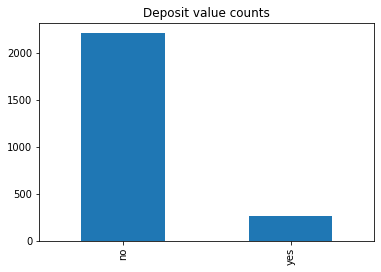

In [ ]:
value_counts= data10["deposit"].value_counts()
print(value_counts)
value_counts.plot.bar(title = 'Deposit value counts')

From the above distribution we can be sure that the data is imbalanced, as the number of "no"s are also 8 times the number of "yes"

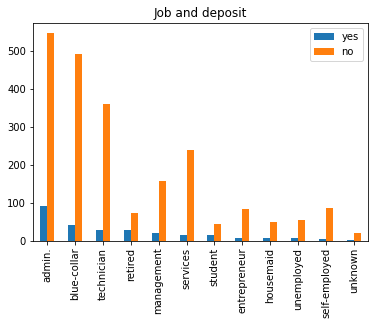

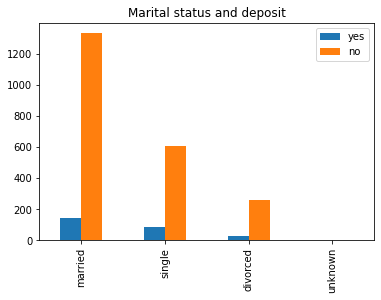

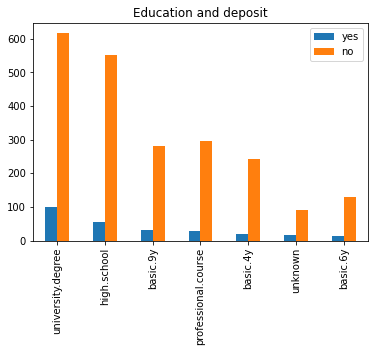

In [ ]:


job_df = pd.DataFrame()

job_df['yes'] = data10[data10['deposit'] == 'yes']['job'].value_counts()
job_df['no'] = data10[data10['deposit'] == 'no']['job'].value_counts()

job_df.plot.bar(title = 'Job and deposit')

######

mar_data = pd.DataFrame()

mar_data['yes'] = data10[data10['deposit'] == 'yes']['marital'].value_counts()
mar_data['no'] = data10[data10['deposit'] == 'no']['marital'].value_counts()

mar_data.plot.bar(title = 'Marital status and deposit')

#########
edu_data = pd.DataFrame()

edu_data['yes'] = data10[data10['deposit'] == 'yes']['education'].value_counts()
edu_data['no'] = data10[data10['deposit'] == 'no']['education'].value_counts()

edu_data.plot.bar(title = 'Education and deposit')

#########


From the above distribution we can see that most of the customers have jobs as "admin", "blue-collar" or "technician" . One interesting thing to find out would be to see the distribution for each classes as well. For example, how many people who work as an admin,having a University degree,maried or having a celulaire as means of contact have subscribed a term deposit.

In [ ]:
data10.dtypes

age                 int64
job                object
marital            object
education          object
housing            object
loan               object
campaign            int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
deposit            object
dtype: object

In [ ]:
var_num= ['age','campaign','previous','emp.var.rate','cons.price.idx','cons.conf.idx',
             'euribor3m','nr.employed']


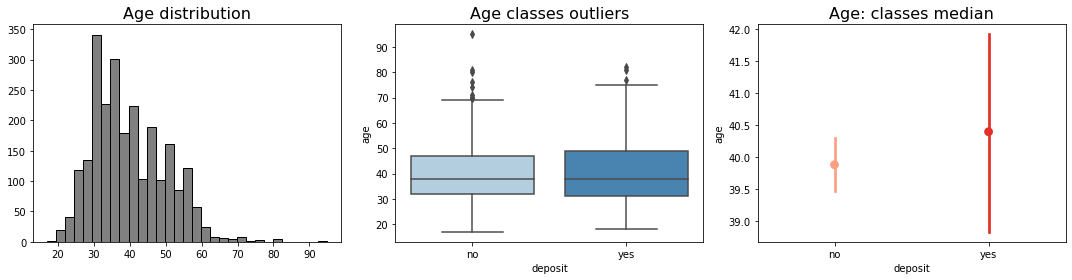

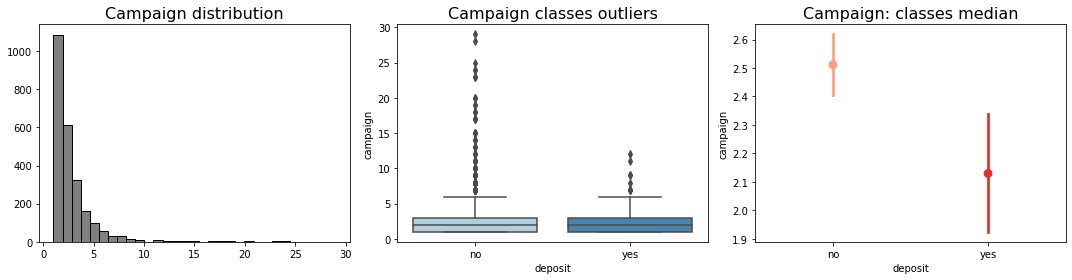

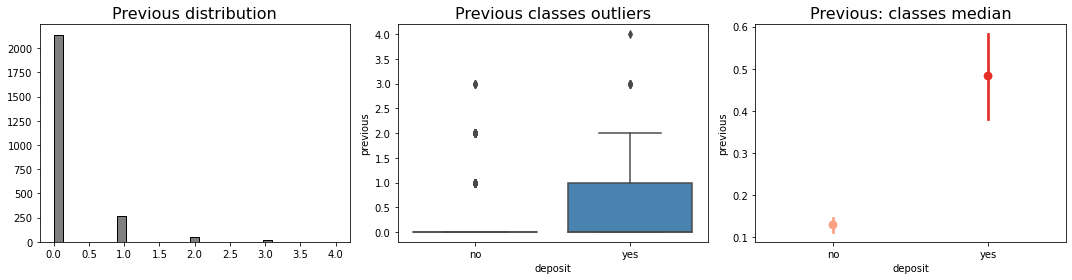

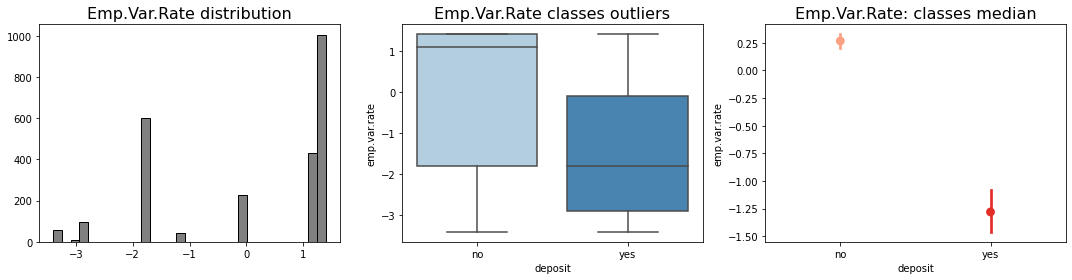

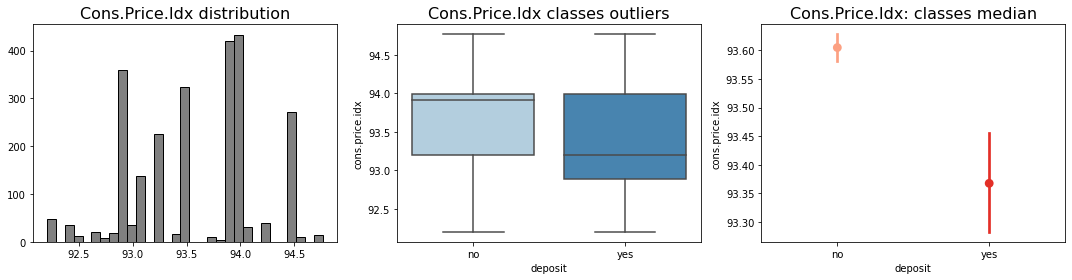

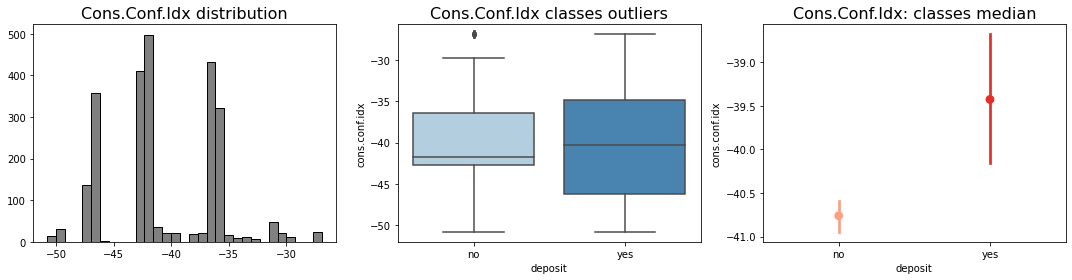

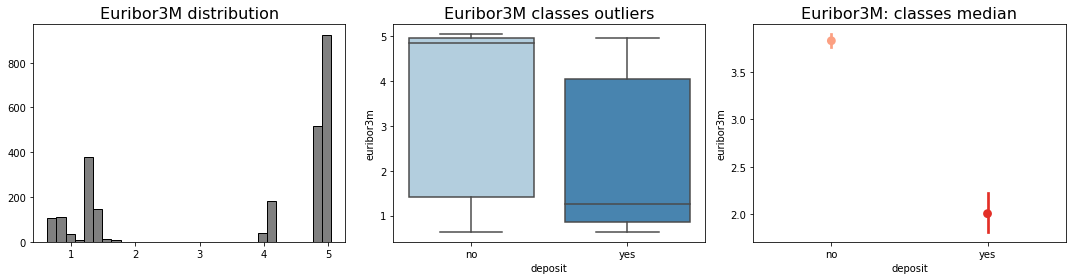

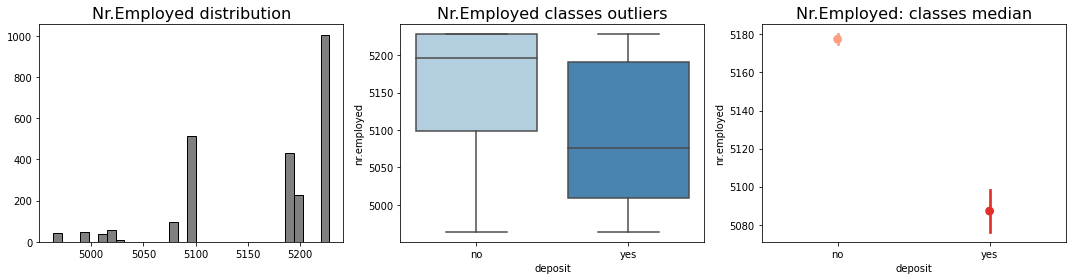

In [ ]:
for col in var_num:
    # setting for multiple graphs
    fig, axs =  plt.subplots(nrows=1, ncols=3, figsize = (15,4))
    axs = axs.reshape(-1)
    
    # plotting the gerneral histogram
    axs[0].hist(data10[col], bins=31, edgecolor = 'black', color = 'grey')
    axs[0].set_title(col.title() + ' distribution', fontsize=16)
    
    # plotting boxcox
    sns.boxplot(data=data10, y=col, x='deposit', ax=axs[1], palette = 'Blues')
    axs[1].set_title(col.title() + ' classes outliers', fontsize=16)
    
    # plotting meadian of the subscrition (no/yes) classes
    sns.pointplot(data=data10,y= col, x='deposit', ax=axs[2], palette = 'Reds')
    axs[2].set_title(col.title() + ': classes median', fontsize=16)
    
    plt.tight_layout()


In [ ]:
var_cat=['job',	'marital',	'education','housing','loan','poutcome']

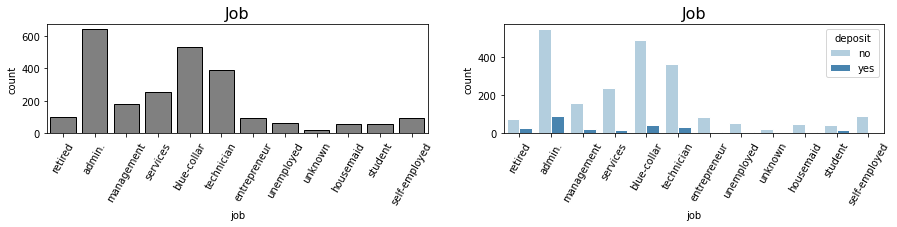

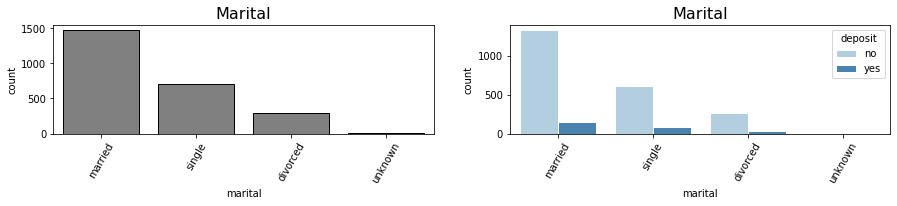

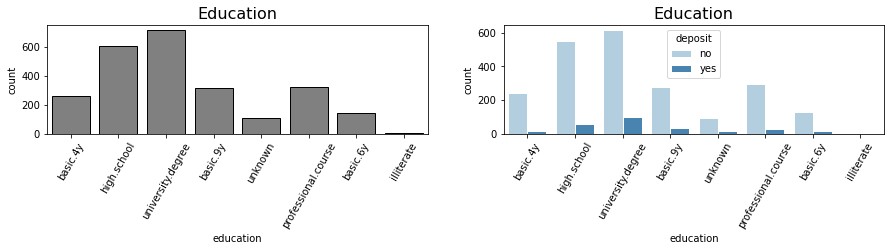

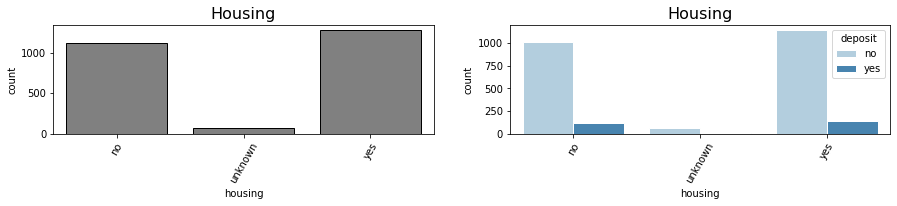

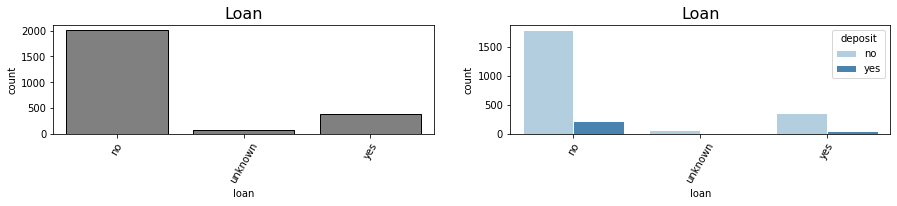

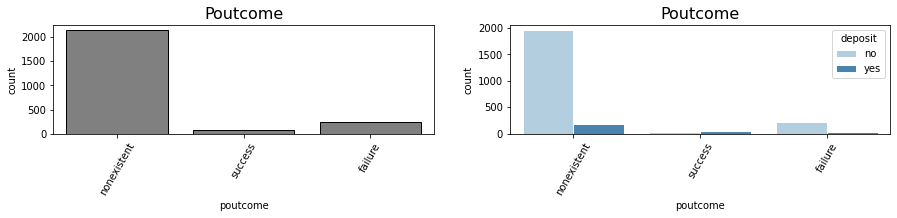

In [ ]:
for col in var_cat:
    
    fig, axs =  plt.subplots(nrows=1, ncols=2, figsize = (15,2))
    axs = axs.reshape(-1)
    
    sns.countplot(data=data10, x=col, ax=axs[0], edgecolor = 'black', color = 'grey')
    axs[0].set_title(col.title(), fontsize=16)
    axs[0].set_xticklabels(labels = data10[col].unique(), rotation=60)
    
    sns.countplot(data=data10, x= col, hue='deposit', ax=axs[1], palette = 'Blues', edgecolor = 'w')
    axs[1].set_title(col.title(), fontsize=16)
    axs[1].set_xticklabels(labels = data10[col].unique(), rotation=60)

### Data Cleaning
Before we will be able to apply machine learning techniques, we should prepare the dataset for processing:

Convert columns with 'yes' and 'no' values to boolean columns;
Convert categorical columns into dummy variables.

In [ ]:
data10.dtypes

age                 int64
job                object
marital            object
education          object
housing            object
loan               object
campaign            int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
deposit            object
dtype: object

In [ ]:
var_num= ['age','campaign','previous','emp.var.rate','cons.price.idx','cons.conf.idx',
             'euribor3m','nr.employed']
var_cat=['job',	'marital',	'education','housing','loan','poutcome']

In [ ]:
data10.dtypes

age                 int64
job                object
marital            object
education          object
housing            object
loan               object
campaign            int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
deposit            object
dtype: object

In [ ]:
# creating new data frame of numerical columns 
data_numerical = data10[var_num]
print('Shape of numerical dataframe {}'.format(data_numerical.shape))
data_numerical.head()

Shape of numerical dataframe (2471, 8)


,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
38017,58,1,0,-3.4,92.379,-29.8,0.781,5017.5
33110,45,12,0,-1.8,92.893,-46.2,1.291,5099.1
22577,36,4,0,1.4,93.444,-36.1,4.964,5228.1
22190,32,2,0,1.4,93.444,-36.1,4.963,5228.1
2195,47,3,0,1.1,93.994,-36.4,4.857,5191.0


In [ ]:
q3 = data_numerical.quantile(0.75)
q1 = data_numerical.quantile(0.25)
iqr = q3 - q1
print('IQR for numerical attributes')
print(iqr)


IQR for numerical attributes
age                15.000
campaign            2.000
previous            0.000
emp.var.rate        3.200
cons.price.idx      0.919
cons.conf.idx       6.300
euribor3m           3.617
nr.employed       129.000
dtype: float64


In [ ]:
data_out = data10[~((data_numerical < (q1 - 1.5 * iqr)) |(data_numerical > (q3 + 1.5 * iqr))).any(axis=1)]
print('{} points are outliers based on IQR'.format(data10.shape[0] - data_out.shape[0]))

467 points are outliers based on IQR


In [ ]:
data10.shape

(2471, 15)

In [ ]:
data10.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
38017,58,retired,married,basic.4y,no,no,1,0,nonexistent,-3.4,92.379,-29.8,0.781,5017.5,no
33110,45,admin.,single,high.school,unknown,unknown,12,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,no
22577,36,management,married,university.degree,no,no,4,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
22190,32,admin.,single,university.degree,yes,no,2,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
2195,47,services,divorced,high.school,no,no,3,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [ ]:

le = preprocessing.LabelEncoder()
data10.job = le.fit_transform(data10.job)
data10.marital = le.fit_transform(data10.marital)
data10.education = le.fit_transform(data10.education)
data10.housing = le.fit_transform(data10.housing)
data10.loan = le.fit_transform(data10.loan)
data10.poutcome = le.fit_transform(data10.poutcome)

In [ ]:
data10.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
38017,58,5,1,0,0,0,1,0,1,-3.4,92.379,-29.8,0.781,5017.5,no
33110,45,0,2,3,1,1,12,0,1,-1.8,92.893,-46.2,1.291,5099.1,no
22577,36,4,1,6,0,0,4,0,1,1.4,93.444,-36.1,4.964,5228.1,no
22190,32,0,2,6,2,0,2,0,1,1.4,93.444,-36.1,4.963,5228.1,no
2195,47,7,0,3,0,0,3,0,1,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
from sklearn.preprocessing import StandardScaler

# Copying original dataframe
data_bank_ready = data10.copy()

scaler = StandardScaler()
var_num= var_num= ['age','job','education','housing','loan','campaign','previous','emp.var.rate','cons.price.idx','cons.conf.idx',
             'euribor3m','nr.employed']
data_bank_ready[var_num] = scaler.fit_transform(data_bank_ready[var_num])

data_bank_ready.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
38017,1.792529,0.350359,1,-1.749938,-1.080725,-0.465906,-0.588275,-0.35687,1,-2.256237,-2.069286,2.353288,-1.651838,-2.072284,no
33110,0.502536,-1.040159,2,-0.347831,-0.064564,0.894914,3.810596,-0.35687,1,-1.225517,-1.183528,-1.214208,-1.356424,-0.947695,no
22577,-0.390536,0.072255,1,1.054275,-1.080725,-0.465906,0.611417,-0.35687,1,0.835921,-0.234009,0.982848,0.771139,0.830147,no
22190,-0.787456,-1.040159,2,1.054275,0.951598,-0.465906,-0.188377,-0.35687,1,0.835921,-0.234009,0.982848,0.770560,0.830147,no
2195,0.700996,0.906565,0,-0.347831,-1.080725,-0.465906,0.211520,-0.35687,1,0.642661,0.713786,0.917589,0.709160,0.318845,no


In [ ]:

data_bank_ready['deposit'] = data_bank_ready['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

data_bank_ready.head()



,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
38017,1.792529,0.350359,1,-1.749938,-1.080725,-0.465906,-0.588275,-0.35687,1,-2.256237,-2.069286,2.353288,-1.651838,-2.072284,0
33110,0.502536,-1.040159,2,-0.347831,-0.064564,0.894914,3.810596,-0.35687,1,-1.225517,-1.183528,-1.214208,-1.356424,-0.947695,0
22577,-0.390536,0.072255,1,1.054275,-1.080725,-0.465906,0.611417,-0.35687,1,0.835921,-0.234009,0.982848,0.771139,0.830147,0
22190,-0.787456,-1.040159,2,1.054275,0.951598,-0.465906,-0.188377,-0.35687,1,0.835921,-0.234009,0.982848,0.770560,0.830147,0
2195,0.700996,0.906565,0,-0.347831,-1.080725,-0.465906,0.211520,-0.35687,1,0.642661,0.713786,0.917589,0.709160,0.318845,0


In [ ]:
X=data_bank_ready.drop(['deposit'],axis=1) 
Y=data_bank_ready['deposit']           
data_bank_ready['deposit'].value_counts()

0    2208
1     263
Name: deposit, dtype: int64

When observation in one class is higher than the observation in other classes then there exists a class imbalance. We can clearly see that there is a huge difference between the data set. Solving this issue we use resampling technique.

##Handling imbalanced data

#Random Over-Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

os =  RandomOverSampler()
X_new,Y_new=os.fit_resample(X,Y)

Original dataset shape Counter({0: 2208, 1: 263})
Resampled dataset shape Counter({0: 2208, 1: 2208})


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


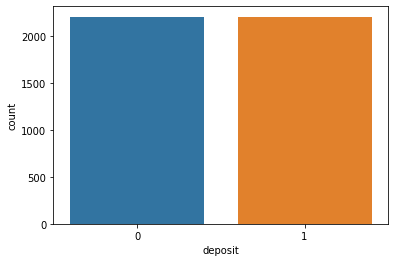

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(Y_new)))
sns.countplot(Y_new)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X_new,Y_new,test_size=.20,random_state=0)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(3532, 14) (884, 14) (3532,) (884,)


##Logistic Regression


ROC_AUC Score: 0.7671248479200642
[[364  83]
 [125 312]]


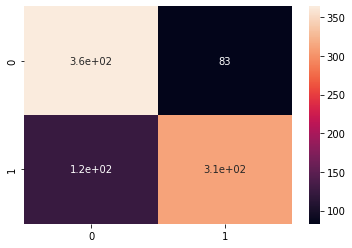

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score


model=LogisticRegression()
model.fit(X_train,Y_train)
pred=model.predict(X_test)

acc_lr=accuracy_score(Y_test,pred)
recall_lr=recall_score(Y_test,pred)
precision_lr=precision_score(Y_test,pred)
f1score_lr=f1_score(Y_test,pred)
AUC_LR=roc_auc_score(pred,Y_test)

print("ROC_AUC Score:",AUC_LR)

cm=confusion_matrix(Y_test,pred)
print(cm)
sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(pred,Y_test))

              precision    recall  f1-score   support

           0       0.81      0.74      0.78       489
           1       0.71      0.79      0.75       395

    accuracy                           0.76       884
   macro avg       0.76      0.77      0.76       884
weighted avg       0.77      0.76      0.77       884



## RandomForest Classifier

ROC_AUC Score: 0.9709051724137931
[[420  27]
 [  0 437]]


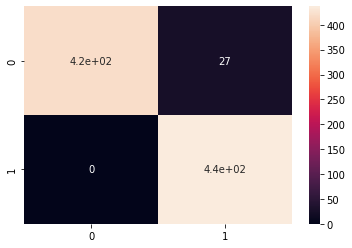

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(X_train, Y_train)
Y_pred = randomforest.predict(X_test)

AUC_RF=roc_auc_score(Y_pred,Y_test)
acc_rf=accuracy_score(Y_test,Y_pred)
recall_rf=recall_score(Y_test,Y_pred)
precision_rf=precision_score(Y_test,Y_pred)
f1score_rf=f1_score(Y_test,Y_pred)
print("ROC_AUC Score:",AUC_RF)

cm=confusion_matrix(Y_test,Y_pred)
print(cm)

sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(Y_pred,Y_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       420
           1       1.00      0.94      0.97       464

    accuracy                           0.97       884
   macro avg       0.97      0.97      0.97       884
weighted avg       0.97      0.97      0.97       884



Accuracy: 0.9626696832579186
[[414  33]
 [  0 437]]
{'ccp_alpha': 0.0001}


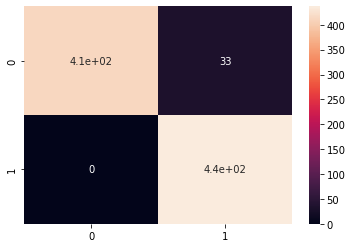

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV 
grid_values = {'ccp_alpha' : [0,0.0001]}

rf_model = RandomForestClassifier(n_estimators=100)
cv = KFold(n_splits = 5, random_state = 1, shuffle = True)
rf_cv = GridSearchCV(rf_model,param_grid = grid_values, scoring = 'accuracy', cv = cv, verbose = 0)
# Fitting the classifier
rf_cv.fit(X_train, Y_train)
rf_pred = rf_cv.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, rf_pred))
#  Confusion matrix
print(confusion_matrix(Y_test, rf_pred))
print(rf_cv.best_params_)
sns.heatmap(confusion_matrix(Y_test, rf_pred),annot=True)

## KNeighbors Classifier

ROC_AUC Score: 0.8934175461038268
[[346   8]
 [101 429]]


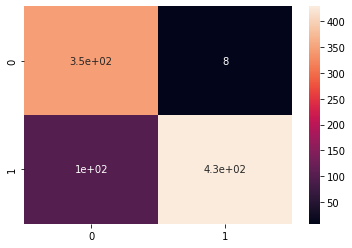

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_predict = knn.predict(X_test)

acc_knn=accuracy_score(Y_test,Y_predict)
recall_knn=recall_score(Y_test,Y_predict)
precision_knn=precision_score(Y_test,Y_predict)
f1score_knn=f1_score(Y_test,Y_predict)

AUC_KN=roc_auc_score(Y_predict,Y_test)
print("ROC_AUC Score:",AUC_KN)
cm=confusion_matrix(Y_predict,Y_test)
print(cm)

sns.heatmap(cm,annot=True)

In [ ]:
print(classification_report(Y_predict,Y_test))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86       354
           1       0.98      0.81      0.89       530

    accuracy                           0.88       884
   macro avg       0.88      0.89      0.88       884
weighted avg       0.90      0.88      0.88       884



In [ ]:
ind=['Logistic regression','Randomforest','KNeighbors']
data1={"Accuracy":[acc_lr,acc_rf,acc_knn],"Recall":[recall_lr,recall_rf,recall_knn],"Precision":[precision_lr,precision_rf,precision_knn],
    'f1_score':[f1score_lr,f1score_rf,f1score_knn],"ROC_AUC":[AUC_LR,AUC_RF,AUC_KN]}
result=pd.DataFrame(data=data1,index=ind)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.764706,0.713959,0.789873,0.750000,0.767125
Randomforest,0.969457,1.000000,0.941810,0.970033,0.970905
KNeighbors,0.876697,0.981693,0.809434,0.887280,0.893418
